# Importing Necessary Libraries

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential, save_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# (1) Loading The Dataset

In [2]:
def load_dataset(dataset_path):
    images = []
    labels = []

    for label_folder in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_folder)

        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)

            img = cv2.imread(image_path)

            img = cv2.resize(img, (224, 224))

            images.append(img)
            labels.append(label_folder)

    return np.array(images), np.array(labels)

# (2) Label Encoding

In [3]:
def label_encoding(data_labels):
    # ('glioma': 0 / 'meningioma': 1 / 'notumor': 2 / 'pituitary': 3)
    general_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

    new_data_labels = []
    for label in data_labels:
        new_data_labels.append(general_labels.index(label))

    return np.array(new_data_labels)

# (3) Model Design

In [4]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=224, activation='relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(units=4, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 128)      

In [5]:
# plot_model(model, show_shapes=True)

# Main Execution

In [6]:
brain_dataset_training_path = '../BT_Dataset/Training'
X_train, y_train = load_dataset(brain_dataset_training_path)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

brain_dataset_testing_path = '../BT_Dataset/Testing'
X_test, y_test = load_dataset(brain_dataset_testing_path)

In [7]:
encoded_y_train = label_encoding(y_train)
print("Encoded Train Labels: ", encoded_y_train[:5])

encoded_y_val = label_encoding(y_val)
print("Encoded Validation Labels: ", encoded_y_val[:5])

encoded_y_test = label_encoding(y_test)
print("Encoded Test Labels: ", encoded_y_test[:5])

Encoded Train Labels:  [2 1 1 2 3]
Encoded Validation Labels:  [2 1 2 1 0]
Encoded Test Labels:  [0 0 0 0 0]


In [8]:
print(f'Train images shape is : {X_train.shape}')
print(f'Train labels shape is : {y_train.shape}')

print(f'Validation images shape is : {X_val.shape}')
print(f'Validation labels shape is : {y_val.shape}')

print(f'Test images shape is : {X_test.shape}')
print(f'Test labels shape is : {y_test.shape}')

Train images shape is : (4569, 224, 224, 3)
Train labels shape is : (4569,)
Validation images shape is : (1143, 224, 224, 3)
Validation labels shape is : (1143,)
Test images shape is : (1311, 224, 224, 3)
Test labels shape is : (1311,)


# Model Training

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, encoded_y_train, validation_data=(X_val, encoded_y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10


143/143 [==============================] - 79s 545ms/step - loss: 18.5568 - accuracy: 0.7207 - val_loss: 0.4355 - val_accuracy: 0.8539
Epoch 2/10
143/143 [==============================] - 79s 549ms/step - loss: 0.3470 - accuracy: 0.8862 - val_loss: 0.3331 - val_accuracy: 0.8976
Epoch 3/10
143/143 [==============================] - 76s 531ms/step - loss: 0.2100 - accuracy: 0.9265 - val_loss: 0.2877 - val_accuracy: 0.9055
Epoch 4/10
143/143 [==============================] - 76s 531ms/step - loss: 0.1533 - accuracy: 0.9486 - val_loss: 0.2818 - val_accuracy: 0.9186
Epoch 5/10
143/143 [==============================] - 76s 530ms/step - loss: 0.1105 - accuracy: 0.9643 - val_loss: 0.3193 - val_accuracy: 0.9239
Epoch 6/10
143/143 [==============================] - 77s 537ms/step - loss: 0.0883 - accuracy: 0.9720 - val_loss: 0.2474 - val_accuracy: 0.9344
Epoch 7/10
143/143 [==============================] - 73s 511ms/step - loss: 0.0914 - accuracy: 0.9729 - val_loss: 0.2822 - val

# Plotting Results

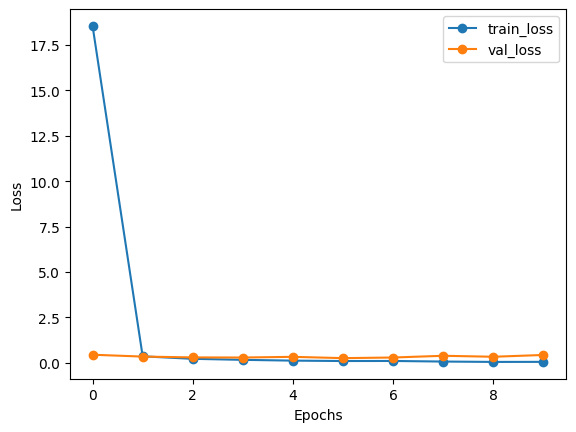

In [11]:
Epochs = [i for i in range(10)]

plt.plot(Epochs, history.history['loss'], marker= 'o', label='train_loss')
plt.plot(Epochs, history.history['val_loss'], marker= 'o', label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

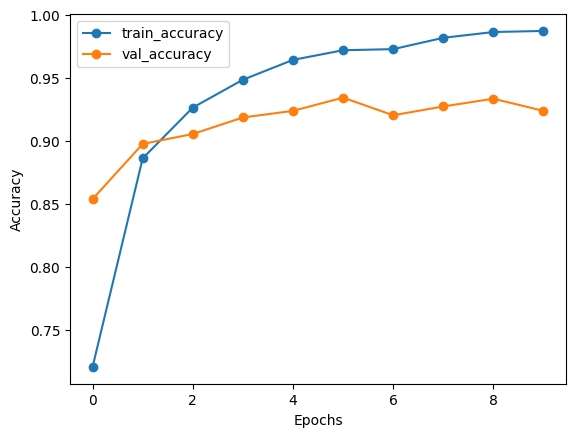

In [12]:
plt.plot(Epochs, history.history['accuracy'], marker= 'o', label='train_accuracy')
plt.plot(Epochs, history.history['val_accuracy'], marker= 'o', label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Model Evaluation

41/41 [==============================] - 4s 94ms/step


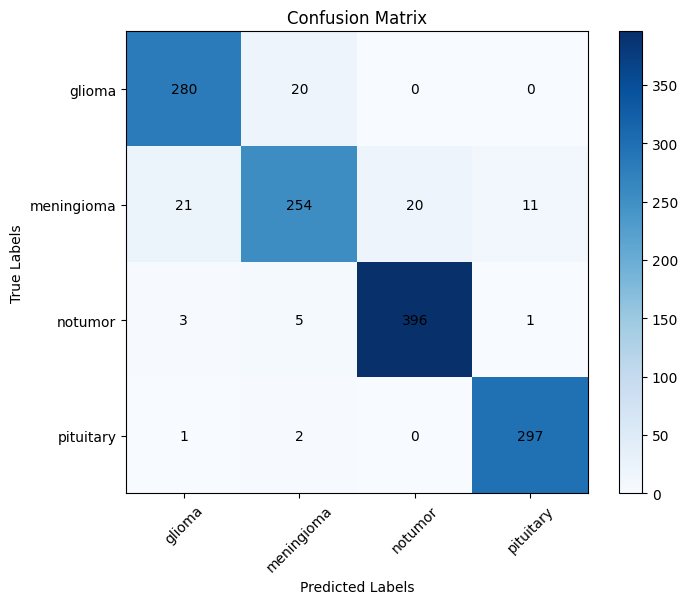

In [13]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

preds = model.predict(X_test)
preds = [np.argmax(pred) for pred in preds]

conf_matrix = confusion_matrix(encoded_y_test, preds)

# Create a figure and axis
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add values to the cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

# Add axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


In [14]:
evaluation = model.evaluate(X_test, encoded_y_test)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

41/41 [==============================] - 4s 95ms/step - loss: 0.3766 - accuracy: 0.9359
Test Loss: 0.3765650987625122
Test Accuracy: 0.9359267950057983


In [15]:
save_model(model, '../saved_models/anotherH', save_format='h5')

C:\Users\AORUS\AppData\Local\Temp\ipykernel_3856\2609853300.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '../saved_models/anotherH', save_format='h5')
